In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
# from pykalman import KalmanFilter
from statsmodels.nonparametric.smoothers_lowess import lowess
from scipy import signal
import scipy.fftpack
from mpl_toolkits.mplot3d import Axes3D
import datetime
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import make_pipeline
import random
from sklearn.model_selection import cross_val_score 
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.ensemble import VotingClassifier,RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pickle

# Model Functions
## Input:
###  `1. X, y and parameters for that model`
###  `2. n for n-old cross val score`

## Output:
### `1. Score for training and validation data`
### `2. Predicited probability array`
### `3. Cross val score for n folds?`

In [2]:
def voting_classifier_scores(X, y, n):
    np.random.seed(42)
    X_train, X_valid, y_train, y_valid = train_test_split(X, y)
    model = VotingClassifier([
        ('nb', GaussianNB()),
        ('knn', KNeighborsClassifier(n_neighbors=12)),
        ('svm', SVC(kernel='linear', C=2.0, probability=True)),
        ('tree1', DecisionTreeClassifier(max_depth=4)),
        ('tree2', DecisionTreeClassifier(min_samples_leaf=10)),
        ('rfc', RandomForestClassifier(n_estimators=50, max_depth=8))
    ], voting='soft')
    model.fit(X_train, y_train)
    t_score = model.score(X_train, y_train)
    v_score = model.score(X_valid, y_valid)
    y_predicted_prob = model.predict_proba(X_valid)
    CVS_mean = np.mean(cross_val_score(model, X, y, cv = n))
    y_predicted = model.predict(X_valid)
    return [t_score, v_score, y_predicted, CVS_mean, y_predicted_prob, y_valid]

In [3]:
def random_forest_scores(X, y, n):
    np.random.seed(42)
    X_train, X_valid, y_train, y_valid = train_test_split(X, y)
    model = make_pipeline(
        MinMaxScaler(),
        RandomForestClassifier(n_estimators=100, max_depth=10)
    )
    model.fit(X_train, y_train)
    t_score = model.score(X_train, y_train)
    v_score = model.score(X_valid, y_valid) 
    y_predicted_prob = model.predict_proba(X_valid)
    CVS_mean = np.mean(cross_val_score(model, X, y, cv = n))
    y_predicted = model.predict(X_valid)
    
    # Saving the model
    pickle.dump(model,open("Models/RandomForestClf.pkl", "wb"))
    
    return [t_score, v_score, y_predicted, CVS_mean, y_predicted_prob, y_valid]

In [4]:
def svc_scores(X, y, n):
    X_train, X_valid, y_train, y_valid = train_test_split(X, y)
    model = make_pipeline(
        StandardScaler(),
        SVC(kernel='linear', C=2.0, probability=True)
    )
    model.fit(X_train, y_train)
    t_score = model.score(X_train, y_train)
    v_score = model.score(X_valid, y_valid) 
    y_predicted_prob = model.predict_proba(X_valid)
    CVS_mean = np.mean(cross_val_score(model, X, y, cv = n))
    y_predicted = model.predict(X_valid)
    return [t_score, v_score, y_predicted, CVS_mean, y_predicted_prob, y_valid]

In [5]:
def knn_scores(X, y, n):
    X_train, X_valid, y_train, y_valid = train_test_split(X, y)
    model = make_pipeline(
        MinMaxScaler(),
        KNeighborsClassifier(n_neighbors=8)
    )
    model.fit(X_train, y_train)
    t_score = model.score(X_train, y_train)
    v_score = model.score(X_valid, y_valid) 
    y_predicted_prob = model.predict_proba(X_valid)
    CVS_mean = np.mean(cross_val_score(model, X, y, cv = n))
    y_predicted = model.predict(X_valid)
    return [t_score, v_score, y_predicted, CVS_mean, y_predicted_prob, y_valid]

In [6]:
def pca_svc_scores(X, y, n):
    X_train, X_valid, y_train, y_valid = train_test_split(X, y)
    model = make_pipeline(
        PCA(10),
        SVC(kernel='linear', C=2.0, probability=True)
    )
    model.fit(X_train, y_train)
    t_score = model.score(X_train, y_train)
    v_score = model.score(X_valid, y_valid) 
    y_predicted_prob = model.predict_proba(X_valid)
    CVS_mean = np.mean(cross_val_score(model, X, y, cv = n))
    y_predicted = model.predict(X_valid)
    return [t_score, v_score, y_predicted, CVS_mean, y_predicted_prob, y_valid]

In [7]:
def decision_tree_scores(X, y, n):
    X_train, X_valid, y_train, y_valid = train_test_split(X, y)
    model = make_pipeline(
        MinMaxScaler(),
        DecisionTreeClassifier(max_depth=4)
    )
    model.fit(X_train, y_train)
    t_score = model.score(X_train, y_train)
    v_score = model.score(X_valid, y_valid) 
    y_predicted_prob = model.predict_proba(X_valid)
    CVS_mean = np.mean(cross_val_score(model, X, y, cv = n))
    y_predicted = model.predict(X_valid)
    return [t_score, v_score, y_predicted, CVS_mean, y_predicted_prob, y_valid]

In [8]:
def nb_scores(X, y, n):
    X_train, X_valid, y_train, y_valid = train_test_split(X, y)
    model = make_pipeline(
        MinMaxScaler(),
        GaussianNB()
    )
    model.fit(X_train, y_train)
    t_score = model.score(X_train, y_train)
    v_score = model.score(X_valid, y_valid) 
    y_predicted_prob = model.predict_proba(X_valid)
    CVS_mean = np.mean(cross_val_score(model, X, y, cv = n))
    y_predicted = model.predict(X_valid)
    return [t_score, v_score, y_predicted, CVS_mean, y_predicted_prob, y_valid]

In [9]:
def nb_with_priors_scores(X, y, n):
    X_train, X_valid, y_train, y_valid = train_test_split(X, y)
    model = make_pipeline(
        MinMaxScaler(),
        GaussianNB(priors=[25/30, 5/30])
    )
    model.fit(X_train, y_train)
    t_score = model.score(X_train, y_train)
    v_score = model.score(X_valid, y_valid) 
    y_predicted_prob = model.predict_proba(X_valid)
    CVS_mean = np.mean(cross_val_score(model, X, y, cv = n))
    y_predicted = model.predict(X_valid)
    return [t_score, v_score, y_predicted, CVS_mean, y_predicted_prob, y_valid]

In [10]:
def gradient_boosting_scores(X, y, n):
    X_train, X_valid, y_train, y_valid = train_test_split(X, y)
    model = make_pipeline(
        MinMaxScaler(),
        GradientBoostingClassifier(n_estimators=20, max_depth=3, min_samples_leaf=0.3)
    )
    model.fit(X_train, y_train)
    t_score = model.score(X_train, y_train)
    v_score = model.score(X_valid, y_valid) 
    y_predicted_prob = model.predict_proba(X_valid)
    CVS_mean = np.mean(cross_val_score(model, X, y, cv = n))
    y_predicted = model.predict(X_valid)
    return [t_score, v_score, y_predicted, CVS_mean, y_predicted_prob, y_valid]

In [11]:
def ada_boost_scores(X, y, n):
    X_train, X_valid, y_train, y_valid = train_test_split(X, y)
    model = make_pipeline(
        MinMaxScaler(),
        AdaBoostClassifier(n_estimators=10, random_state=2)
    )
    model.fit(X_train, y_train)
    t_score = model.score(X_train, y_train)
    v_score = model.score(X_valid, y_valid) 
    y_predicted_prob = model.predict_proba(X_valid)
    CVS_mean = np.mean(cross_val_score(model, X, y, cv = n))
    y_predicted = model.predict(X_valid)
    
    pickle.dump(model,open("Models/AdaBoostClf.pkl", "wb"))
    
    return [t_score, v_score, y_predicted, CVS_mean, y_predicted_prob, y_valid]

In [12]:
def mpl_scores(X, y, n):
    X_train, X_valid, y_train, y_valid = train_test_split(X, y)
    model = make_pipeline(
        MinMaxScaler(),
        MLPClassifier(solver='lbfgs', hidden_layer_sizes=(4,3),
                      learning_rate='adaptive', activation='logistic',
                      max_iter=4000)
    )
    model.fit(X_train, y_train)
    t_score = model.score(X_train, y_train)
    v_score = model.score(X_valid, y_valid) 
    y_predicted_prob = model.predict_proba(X_valid)
    CVS_mean = np.mean(cross_val_score(model, X, y, cv = n))
    
    pickle.dump(model,open("Models/MlpClf.pkl", "wb"))
    
    y_predicted = model.predict(X_valid)
    return [t_score, v_score, y_predicted, CVS_mean, y_predicted_prob, y_valid]

## Best parameter finding for 
1. Random forest 
2. svc

In [13]:
grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

grid_2 = {'n_estimators': [1200, 1500, 2000],
          'max_depth': [None, 5, 10],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [4, 6],
          'min_samples_leaf': [1, 2]}

In [14]:
def random_forest_BestParam(X, y, n):
    np.random.seed(42)
    X_train, X_valid, y_train, y_valid = train_test_split(X, y)
    m = RandomForestClassifier(n_estimators=100, max_depth=10)
    
    model = GridSearchCV(estimator=m,
                      param_grid=grid_2,
                      cv=5 # 5-fold cross-validation
                      ) #
    
    model.fit(X_train, y_train)
    t_score = model.score(X_train, y_train)
    v_score = model.score(X_valid, y_valid) 
    y_predicted = model.predict_proba(X_valid)
    CVS_mean = np.mean(cross_val_score(model, X, y, cv = n))
    return [t_score, v_score, y_predicted, CVS_mean, y_valid]

In [15]:
def svc_scores_BestParam(X, y, n):
    X_train, X_valid, y_train, y_valid = train_test_split(X, y)
    model = make_pipeline(
        StandardScaler(),
        SVC(kernel='linear', C=2.0)
    )
    model.fit(X_train, y_train)
    t_score = model.score(X_train, y_train)
    v_score = model.score(X_valid, y_valid) 
    CVS_mean = np.mean(cross_val_score(model, X, y, cv = n))
    return [t_score, v_score, y_predicted, CVS_mean, y_valid]

#  `Import transformed data here`

In [16]:
walkSit = pd.read_csv("Data/Transformed/walkSit.csv")
walkFall = pd.read_csv("Data/Transformed/walkFall.csv")
runFall = pd.read_csv("Data/Transformed/runFall.csv")
downSit = pd.read_csv("Data/Transformed/downSit.csv")
freeFall = pd.read_csv("Data/Transformed/freeFall.csv")

#  `Combining Data`

In [17]:
df = pd.concat([walkSit, walkFall, runFall, downSit, freeFall]).reset_index(drop=True)

In [18]:
X = df.drop("Fall", axis = 1)
y = df.Fall

# `ROC Curve`

In [19]:
def plot_roc_curve(fpr, tpr, model):
    """
    Input  :  1. False positve rate (fpr) of model 
              2. True postive rate (tpr) of model
              3. Name of model
    Output :  -> Roc Curve plot 
    """
    plt.figure(figsize=(11,7))
    # Plotting ROC curve
    plt.plot(fpr, tpr, color='red', label='ROC')
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Guess')
    plt.plot([0, 1], [1, 1], color='orange', linestyle='-.', label='Best')
    plt.plot([0, 0], [0, 1], color='orange', linestyle='-.')
    plt.xlabel('False Positive Rate', fontsize=16,fontweight = 'bold').set_color('black')
    plt.ylabel('True Positive Rate', fontsize=16,fontweight = 'bold').set_color('black')
    plt.title(f'ROC Curve using {model}',fontsize=20,fontweight = 'bold')
    plt.legend(fontsize=15, loc = 0)
    plt.savefig(f"Images/Significant_plots/Roc{model}.jpeg")
    plt.show()

# `Confusion matrix`

In [20]:
def plot_conf_mat(conf_mat, model):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(6, 6))
    ax = sns.heatmap(conf_mat,
                     annot=True, # Annotate the boxes 
                     cbar=False)
    plt.title(f'Confusion matrix \n using {model}', fontsize=18,fontweight = 'bold')
    plt.xlabel('Predicted label', fontsize=16,fontweight = 'bold').set_color('black')
    plt.ylabel('True label', fontsize=16,fontweight = 'bold').set_color('black')
    plt.savefig(f"Images/Significant_plots/Conf_{model}.jpeg")

In [21]:
def print_classification_report(y_test, y_valid):    
    print(pd.DataFrame(classification_report(y_test, y_valid, output_dict=True)))
    
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2), 
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    
    return metric_dict

In [22]:
def model_automator(model, n, Model_Name):
    np.random.seed(50)
    
    train_score, test_score, y_predicted, mean_n, y_predicted_prob, y_valid = model(X, y, n)
    print(f"Train data Accuracy                           : {train_score * 100:.2f}%")
    print(f"Test data Accuracy                            : {test_score * 100:.2f}%")
    print(f"{n}-fold Accuracy                               : {mean_n * 100:.2f}%")
    y_predicted_prob = y_predicted_prob[:, 1]
    fpr, tpr, thresholds = roc_curve(y_valid, y_predicted)
    print("Receiver Operating Characteristic (ROC) Score :",roc_auc_score(y_valid, y_predicted_prob))
    plot_roc_curve(fpr,tpr, Model_Name)
    matrix = confusion_matrix(y_valid, y_predicted)
    
    plot_conf_mat(matrix, Model_Name)
    
    print_classification_report(y_valid, y_predicted)
    

# Make the model, train it, whatever

# `Model Function Calls`

## `1.  Voting Classifier`

Train data Accuracy                           : 96.99%
Test data Accuracy                            : 100.00%
20-fold Accuracy                               : 94.24%
Receiver Operating Characteristic (ROC) Score : 1.0


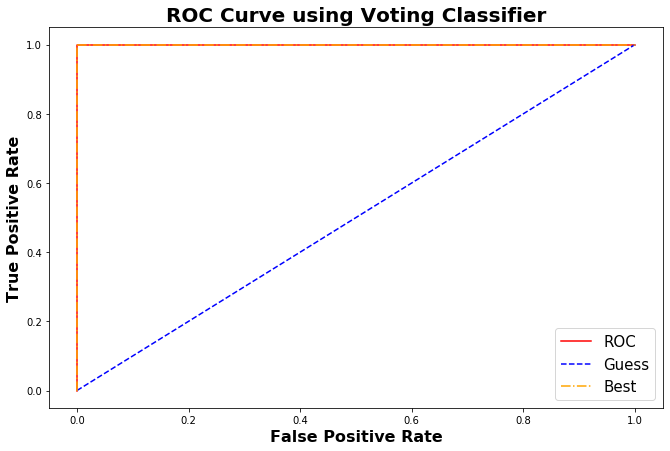

              0     1  accuracy  macro avg  weighted avg
precision   1.0   1.0       1.0        1.0           1.0
recall      1.0   1.0       1.0        1.0           1.0
f1-score    1.0   1.0       1.0        1.0           1.0
support    21.0  24.0       1.0       45.0          45.0


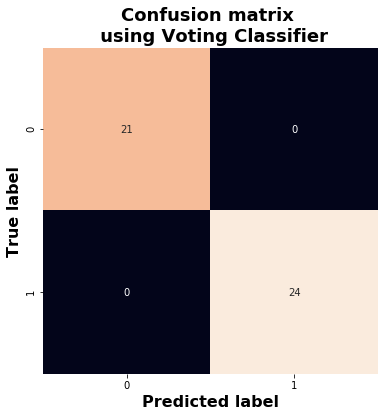

In [23]:
np.random.seed(42)
model_automator(voting_classifier_scores, 20, "Voting Classifier")

## `2. Random Forest Classifier`

Train data Accuracy                           : 100.00%
Test data Accuracy                            : 100.00%
20-fold Accuracy                               : 95.90%
Receiver Operating Characteristic (ROC) Score : 1.0


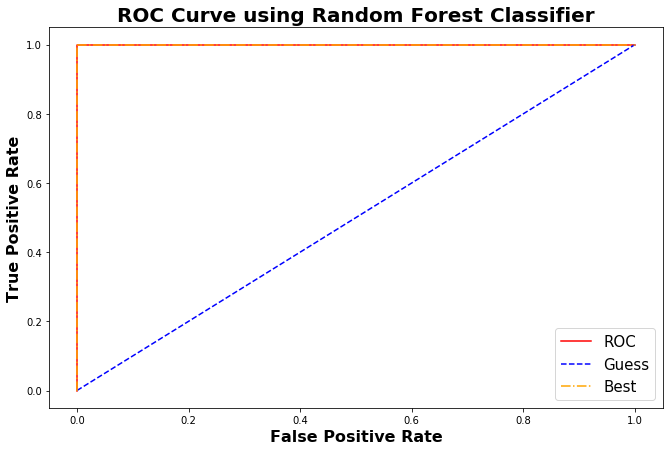

              0     1  accuracy  macro avg  weighted avg
precision   1.0   1.0       1.0        1.0           1.0
recall      1.0   1.0       1.0        1.0           1.0
f1-score    1.0   1.0       1.0        1.0           1.0
support    21.0  24.0       1.0       45.0          45.0


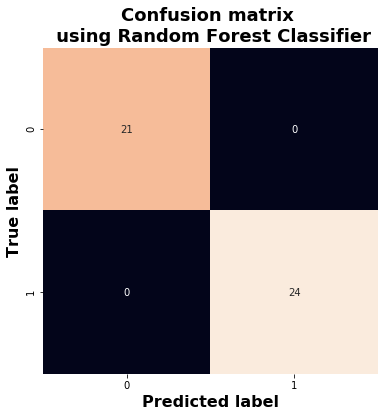

In [24]:
np.random.seed(42)
model_automator(random_forest_scores, 20, "Random Forest Classifier")

## `3. SVC`

Train data Accuracy                           : 97.74%
Test data Accuracy                            : 100.00%
20-fold Accuracy                               : 96.46%
Receiver Operating Characteristic (ROC) Score : 1.0


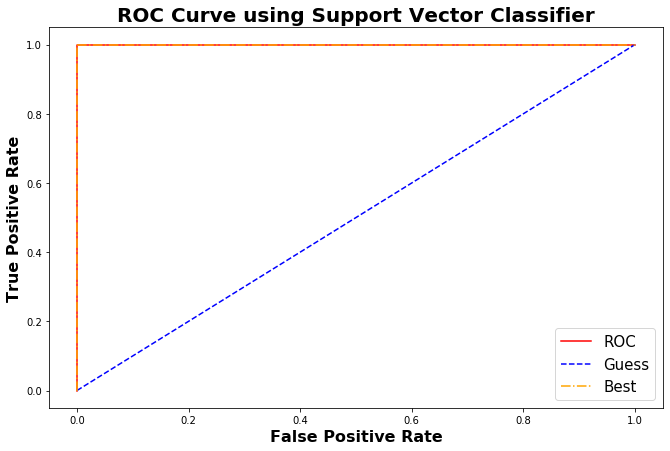

              0     1  accuracy  macro avg  weighted avg
precision   1.0   1.0       1.0        1.0           1.0
recall      1.0   1.0       1.0        1.0           1.0
f1-score    1.0   1.0       1.0        1.0           1.0
support    20.0  25.0       1.0       45.0          45.0


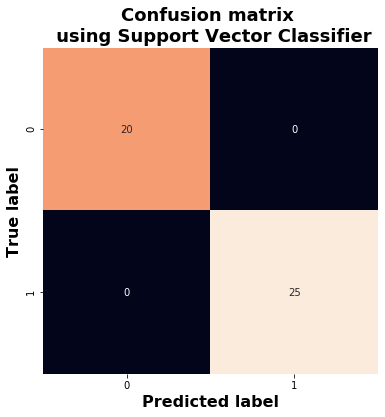

In [25]:
np.random.seed(42)
model_automator(svc_scores, 20, "Support Vector Classifier")

## `4. KNN`

Train data Accuracy                           : 90.98%
Test data Accuracy                            : 84.44%
20-fold Accuracy                               : 89.79%
Receiver Operating Characteristic (ROC) Score : 0.967


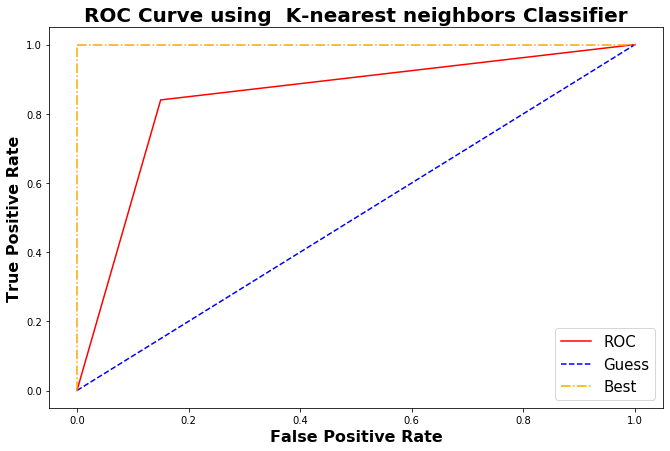

                   0          1  accuracy  macro avg  weighted avg
precision   0.809524   0.875000  0.844444   0.842262      0.845899
recall      0.850000   0.840000  0.844444   0.845000      0.844444
f1-score    0.829268   0.857143  0.844444   0.843206      0.844754
support    20.000000  25.000000  0.844444  45.000000     45.000000


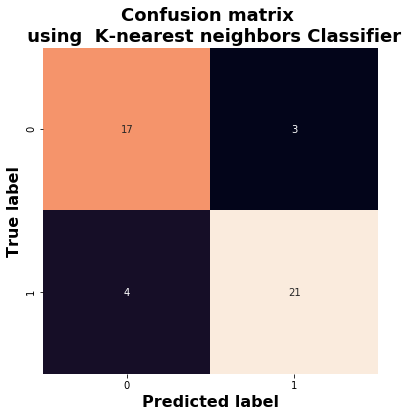

In [26]:
np.random.seed(42)
model_automator(knn_scores, 20, " K-nearest neighbors Classifier")

## `5. pca_svc_scores` 

Train data Accuracy                           : 95.49%
Test data Accuracy                            : 100.00%
20-fold Accuracy                               : 95.90%
Receiver Operating Characteristic (ROC) Score : 1.0


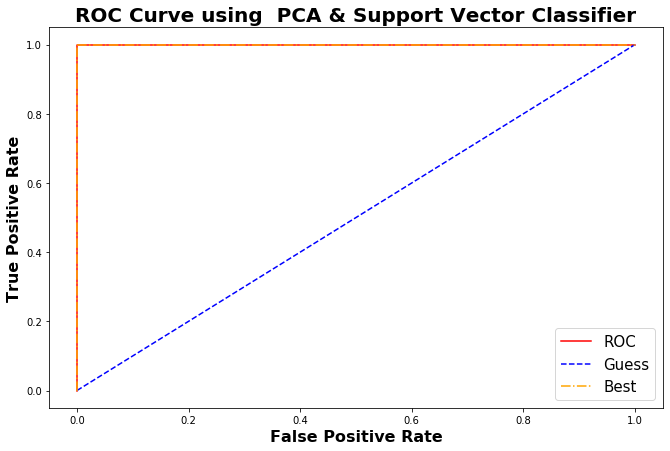

              0     1  accuracy  macro avg  weighted avg
precision   1.0   1.0       1.0        1.0           1.0
recall      1.0   1.0       1.0        1.0           1.0
f1-score    1.0   1.0       1.0        1.0           1.0
support    20.0  25.0       1.0       45.0          45.0


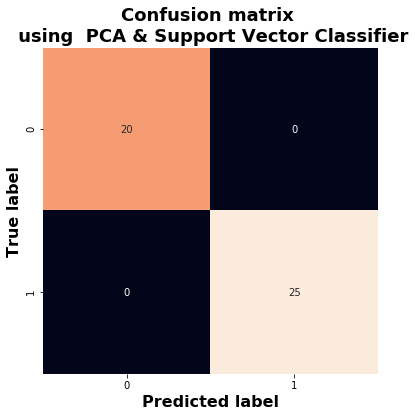

In [27]:
np.random.seed(42)
model_automator(pca_svc_scores, 20, " PCA & Support Vector Classifier")

## `6. Decision Tree`

Train data Accuracy                           : 99.25%
Test data Accuracy                            : 91.11%
20-fold Accuracy                               : 90.76%
Receiver Operating Characteristic (ROC) Score : 0.91


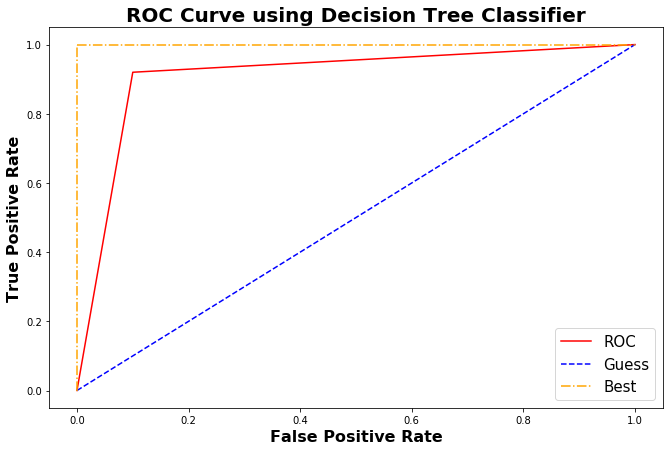

              0      1  accuracy  macro avg  weighted avg
precision   0.9   0.92  0.911111       0.91      0.911111
recall      0.9   0.92  0.911111       0.91      0.911111
f1-score    0.9   0.92  0.911111       0.91      0.911111
support    20.0  25.00  0.911111      45.00     45.000000


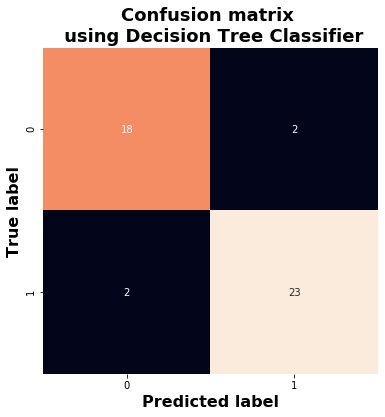

In [28]:
np.random.seed(42)
model_automator(decision_tree_scores, 20, "Decision Tree Classifier")

## `7. NB`

Train data Accuracy                           : 92.48%
Test data Accuracy                            : 95.56%
20-fold Accuracy                               : 93.75%
Receiver Operating Characteristic (ROC) Score : 0.994


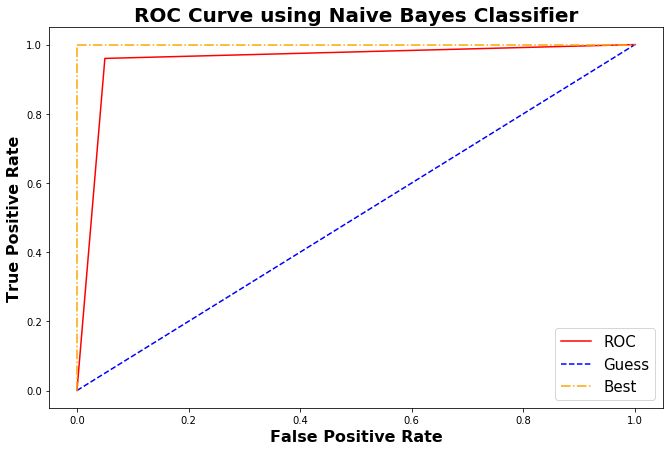

               0      1  accuracy  macro avg  weighted avg
precision   0.95   0.96  0.955556      0.955      0.955556
recall      0.95   0.96  0.955556      0.955      0.955556
f1-score    0.95   0.96  0.955556      0.955      0.955556
support    20.00  25.00  0.955556     45.000     45.000000


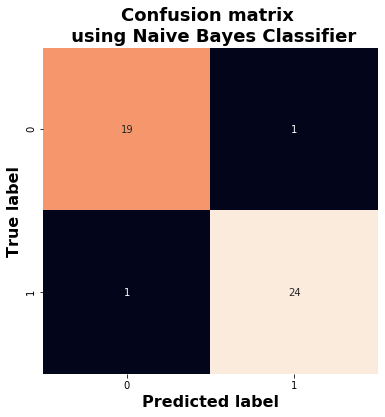

In [29]:
np.random.seed(42)
model_automator(nb_scores, 20, "Naive Bayes Classifier")

## `8. NB with priors` 

Train data Accuracy                           : 92.48%
Test data Accuracy                            : 95.56%
20-fold Accuracy                               : 92.57%
Receiver Operating Characteristic (ROC) Score : 0.994


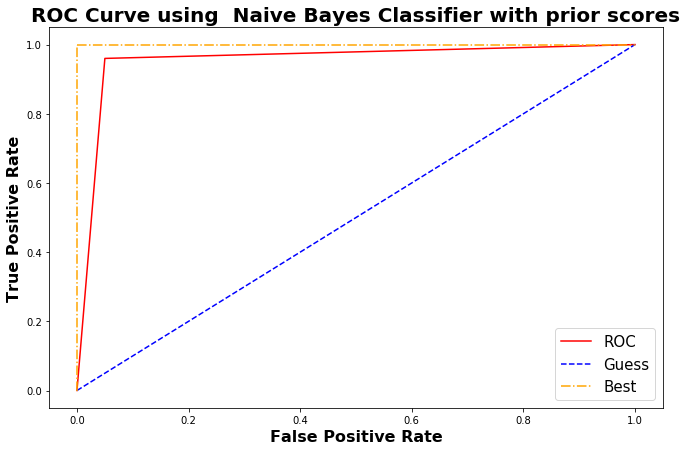

               0      1  accuracy  macro avg  weighted avg
precision   0.95   0.96  0.955556      0.955      0.955556
recall      0.95   0.96  0.955556      0.955      0.955556
f1-score    0.95   0.96  0.955556      0.955      0.955556
support    20.00  25.00  0.955556     45.000     45.000000


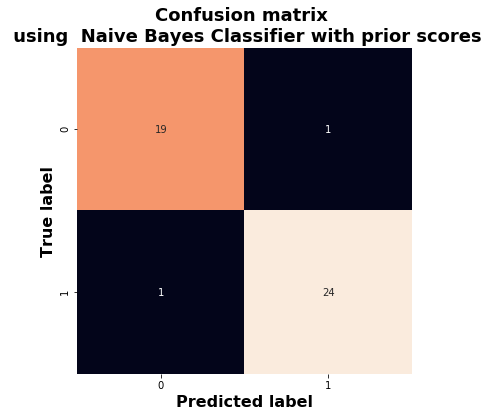

In [30]:
np.random.seed(42)
model_automator(nb_with_priors_scores, 20, " Naive Bayes Classifier with prior scores")

## `9. Gradient Boosting` 

Train data Accuracy                           : 95.49%
Test data Accuracy                            : 100.00%
20-fold Accuracy                               : 94.17%
Receiver Operating Characteristic (ROC) Score : 1.0


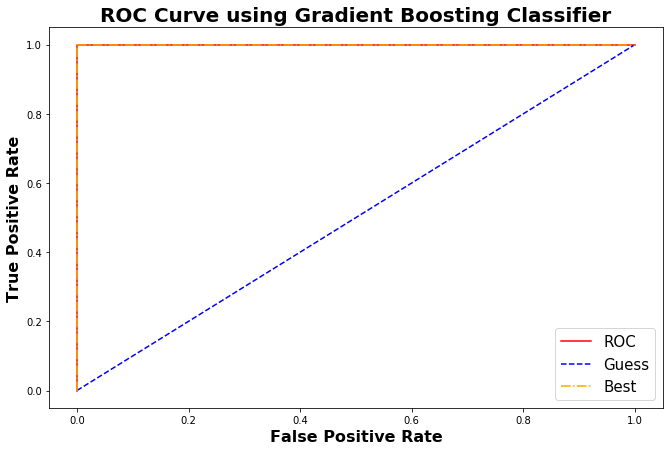

              0     1  accuracy  macro avg  weighted avg
precision   1.0   1.0       1.0        1.0           1.0
recall      1.0   1.0       1.0        1.0           1.0
f1-score    1.0   1.0       1.0        1.0           1.0
support    20.0  25.0       1.0       45.0          45.0


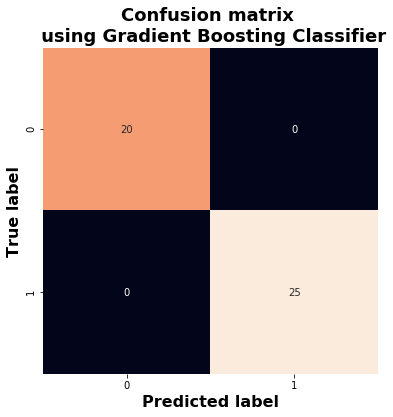

In [31]:
np.random.seed(42)
model_automator(gradient_boosting_scores, 20, "Gradient Boosting Classifier")

## `10. Ada` 

Train data Accuracy                           : 100.00%
Test data Accuracy                            : 100.00%
20-fold Accuracy                               : 97.71%
Receiver Operating Characteristic (ROC) Score : 1.0


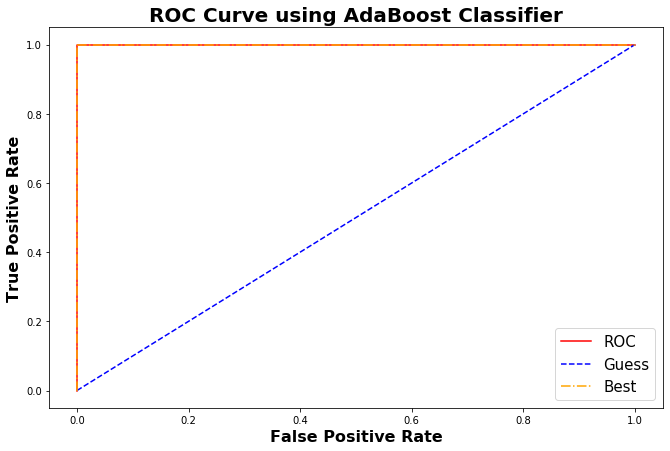

              0     1  accuracy  macro avg  weighted avg
precision   1.0   1.0       1.0        1.0           1.0
recall      1.0   1.0       1.0        1.0           1.0
f1-score    1.0   1.0       1.0        1.0           1.0
support    20.0  25.0       1.0       45.0          45.0


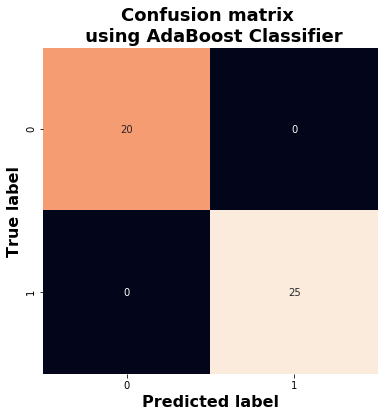

In [32]:
np.random.seed(42)
model_automator(ada_boost_scores, 20, "AdaBoost Classifier")

## `11. MLP` 

Train data Accuracy                           : 100.00%
Test data Accuracy                            : 100.00%
20-fold Accuracy                               : 90.90%
Receiver Operating Characteristic (ROC) Score : 1.0


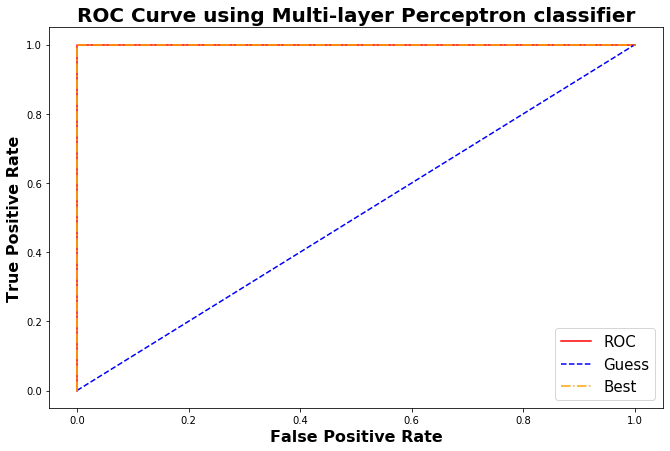

              0     1  accuracy  macro avg  weighted avg
precision   1.0   1.0       1.0        1.0           1.0
recall      1.0   1.0       1.0        1.0           1.0
f1-score    1.0   1.0       1.0        1.0           1.0
support    20.0  25.0       1.0       45.0          45.0


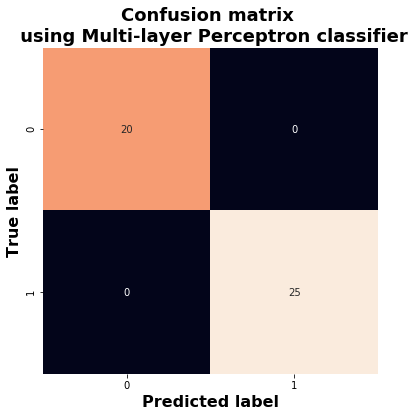

In [33]:
np.random.seed(42)
model_automator(mpl_scores, 20, "Multi-layer Perceptron classifier")

# Grouped barplots for scores

Text(0.5, 22.959999999999987, 'Classifier Name')

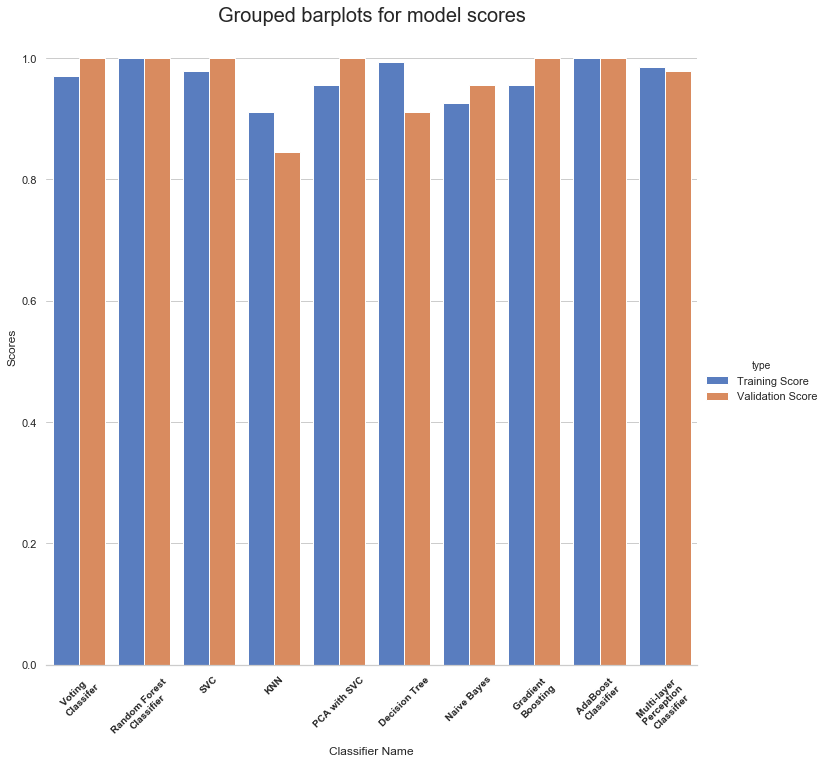

In [34]:
sns.set(style="whitegrid")

scores = pd.DataFrame(data={
    'score': [0.9699, 1, 1, 1, 0.9774, 1, 0.9098, 0.8444, 0.9549, 1, 0.9925, 0.9111, 0.9248, 0.9556, 0.9549, 1, 1, 1, 0.9850, 0.9778],
    'type': ['Training Score', 'Validation Score', 'Training Score', 'Validation Score', 'Training Score', 'Validation Score', 'Training Score', 'Validation Score', 'Training Score', 'Validation Score', 'Training Score', 'Validation Score', 'Training Score', 'Validation Score', 'Training Score', 'Validation Score', 'Training Score', 'Validation Score', 'Training Score', 'Validation Score',],
    'name': ['Voting \nClassifer', 'Voting \nClassifer', 'Random Forest \nClassifier', 'Random Forest \nClassifier', 'SVC', 'SVC', 'KNN', 'KNN', 'PCA with SVC', 'PCA with SVC', 'Decision Tree', 'Decision Tree', 'Naive Bayes', 'Naive Bayes', 'Gradient \nBoosting', 'Gradient \nBoosting', 'AdaBoost \nClassifier', 'AdaBoost \nClassifier', 'Multi-layer \nPerception \nClassifier', 'Multi-layer \nPerception \nClassifier']
})


g = sns.catplot(x="name", y="score", hue="type", data=scores,  kind="bar", palette="muted", height=10)
g.despine(left=True)
g.set_ylabels("Scores")
plt.xticks(
    rotation=45, 
    horizontalalignment='center',
    fontweight='bold',
    fontsize=10  
)
plt.title("Grouped barplots for model scores", fontsize=20)
plt.xlabel("Classifier Name")